 # Real Estate Price Prediction

- The main aim of this project is to predict the property price based on various features which we will discuss as we go ahead

### importing dependencies

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sb


### importing the data
- data is given in csv format, reading it using pandas .read_csv
- after that we will have to analyse the data as there may be various unusefull data in the given training set
- these unusefull features and datas should be removed as some of them can make our model less accurate
- there may be some null values too in columns which should be removed or replaced with appropriate values
- missing values can be handeled by imputation or by filling the places with mean, median or mode.

In [2]:
 # loading the data 
data= pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
data.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


In [5]:
 data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
data.groupby('availability')['availability'].agg('count')

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

In [7]:
data.groupby('society')['society'].agg('count')

society
3Codeli    2
7 ise P    1
A idse     2
A rtsai    1
ACersd     1
          ..
Zonce E    2
Zostaa     3
i1ncyRe    1
i1odsne    1
i1rtsCo    3
Name: society, Length: 2688, dtype: int64

In [8]:
data1=data.drop(['area_type','society','availability'],axis='columns')
data1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [10]:
##handling missing values
data1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [11]:
data1.groupby('balcony')['balcony'].agg('count')

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

In [12]:
 df=data1.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12710 non-null  object 
 1   size        12710 non-null  object 
 2   total_sqft  12710 non-null  object 
 3   bath        12710 non-null  float64
 4   balcony     12710 non-null  float64
 5   price       12710 non-null  float64
dtypes: float64(3), object(3)
memory usage: 695.1+ KB


In [14]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

## Exploratory Data Analysis

In [15]:
## analysing size coloumn
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

### as there are num+strings in the size column, we can observe that the only num part matters, therefor, we are going to remove those strings part.

In [16]:
## converting these num+string values into num part only
df['bhk']=df['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\user\AppData\Local\Temp/ipykernel_471500/799536366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bhk']=df['size'].apply(lambda x: int(x.split(' ')[0]))


In [17]:
df.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [18]:
df['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [19]:
df[df['bhk']>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [20]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
## choosing right value for the ranges given in total_sqt
##this functions help in to return data frame with item which are float
##for the selected coloumns
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True 

In [22]:
df[~df['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2


In [23]:
## to handel these range values in total_sqft
## we will put the avg of the range at that place

In [24]:
 # function to convert the ranges into avg vals
def convt_to_avg(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
df['total_sqft']=df['total_sqft'].apply(convt_to_avg)

C:\Users\user\AppData\Local\Temp/ipykernel_471500/2918017111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft']=df['total_sqft'].apply(convt_to_avg)


In [26]:
df.head(10)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2


In [27]:
df=df.drop(['size'],axis='columns')

In [28]:
df.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [29]:
df.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

### adding a new feature -> pice_per_sqft

In [30]:

df2=df.copy()
df2['price_per_sqft']=df2['price']*100000/df2['total_sqft']


In [31]:
df2.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


## handling categoral feature - location

In [32]:
len(df2.location.unique())

1265

## since there are 1265 unique locations we cannot use one hot encoding here it will increase the no. of columns which will lead us to curse of diamensions


In [33]:
#striping tha extra white spaces from location column
df2['location']=df2['location'].apply(lambda x: x.strip())

In [34]:
    location_stats=df2.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [35]:
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [36]:
len(location_stats[location_stats<=10])

1017

### Since there are 1017 values in locations whose occurances are less than = 10, we can combine them in one group->others so that our no. of cols reduces when we perform one hot encoding

In [37]:
location_stats_10=location_stats[location_stats<=10]

In [38]:
location_stats_10

location
1st Block Koramangala    10
Kalkere                  10
Basapura                 10
Kodigehalli              10
Gunjur Palya             10
                         ..
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1017, dtype: int64

In [39]:
df2.location=df2['location'].apply(lambda x:'other' if x in location_stats_10 else x)

In [40]:
len(df2.location.unique())

238

In [41]:
df2.head(10)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,1800.0,2.0,2.0,70.00,3,3888.888889
11,Whitefield,2785.0,5.0,3.0,295.00,4,10592.459605
12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2,3800.000000


## Outliers check

<AxesSubplot:xlabel='total_sqft'>

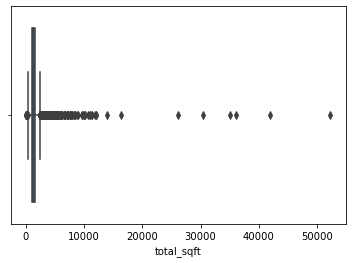

In [42]:
sb.boxplot(x='total_sqft',data=df2, orient="h")

<AxesSubplot:xlabel='bhk'>

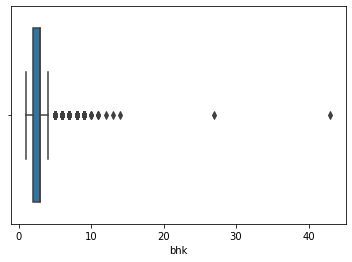

In [43]:
sb.boxplot(x='bhk',data=df2, orient="h")

<AxesSubplot:xlabel='bath'>

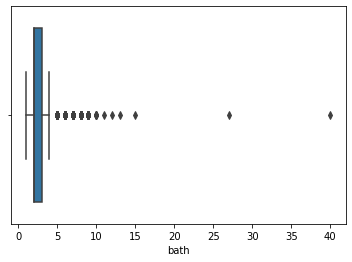

In [44]:
sb.boxplot(x='bath',data=df2, orient="h")

In [45]:
##outliers in total_sqft based on bhk

In [46]:
# considering 300sqft as a minimum area for a bed room,
# based on this, finding cases where there are outliers for this case

In [47]:
df2[(df2.total_sqft/df2.bhk)<300]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.211268
...,...,...,...,...,...,...,...
13219,Laggere,1590.0,9.0,3.0,132.0,7,8301.886792
13221,other,1178.0,9.0,1.0,75.0,9,6366.723260
13281,Margondanahalli,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,3.0,70.0,5,9043.927649


In [48]:
df2.shape

(12710, 7)

In [49]:
## dropping those outliers
df3=df2[~(df2.total_sqft/df2.bhk<300)]
df3.shape

(12055, 7)

In [50]:
#checking for outliers in price_per_sqft 
df3.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [51]:
#handling the outliers in price_per-sqft using standard deviation
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        stdv = np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-stdv)) & (subdf.price_per_sqft<=(m+stdv))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df4=remove_pps_outliers(df3)
df4.shape

(9848, 7)

In [52]:
# removing cases where price is more than it should be for respective bhk


In [53]:
def bhk_outlier(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std' :  np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df5=bhk_outlier(df4)
df5.shape

(7025, 7)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

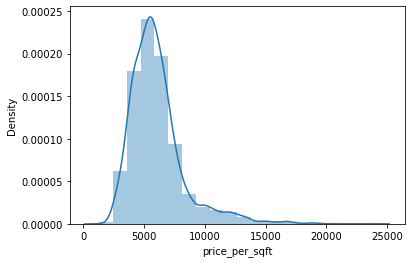

In [54]:
sb.distplot(df5["price_per_sqft"], bins=20)

<AxesSubplot:>

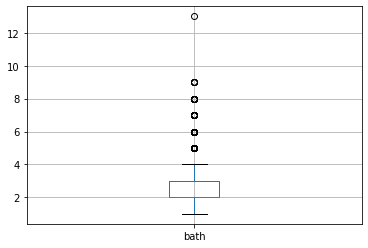

In [55]:
# analysing bath coloumn
df5.boxplot('bath')

In [56]:
df5[df5.bath>df5.bhk+2]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1542,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
6450,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8091,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [57]:
df6=df5[df5.bath<df5.bhk+2]
df6.shape

(6958, 7)

In [58]:
df6.head(10)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4,15018.181818
6,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4,15020.408163
8,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3,8906.666667
9,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,3,10169.491525
10,1st Phase JP Nagar,2059.0,3.0,2.0,225.0,3,10927.634774


In [59]:
# dropping price_per_sqft
# as it was just added for detecting outliers
df7=df6.drop(['price_per_sqft'],axis='columns')
df7.head(5)

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


### using one hot encoding to convert categorial feature into numerical columns

In [60]:

dummies = pd.get_dummies(df7.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df8=pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')

In [62]:
df8.head(10)

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1st Phase JP Nagar,2059.0,3.0,2.0,225.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df9=df8.drop(['location'],axis='columns')

## Model building

In [64]:

x=df9.drop('price',axis='columns')
x.head(10)

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,0.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,2.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1875.0,3.0,1.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2065.0,4.0,1.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2059.0,3.0,2.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
y=df9.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

### train and test split, using sklearn 

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

### testing model with linear regression

In [67]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8584587986234865

### cross validation score for 5 folds

In [68]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.8773143 , 0.84355571, 0.78319592, 0.89718661, 0.8720526 ])

### hyper paramete tuning using grid seacrch cv

### testing best fit model using diff regression algos

In [69]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_squared_error

In [70]:

# finding best fit model
def best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
                'selection': ['random', 'cyclic']
            }
        },
        
        'decesion_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }

    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [71]:
best_model_using_gridsearchcv(x, y)

,model,best_score,best_params
0,linear_regression,0.854661,{'normalize': False}
1,lasso,0.807888,"{'alpha': 0.1, 'selection': 'random'}"
2,decesion_tree,0.740606,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [72]:
### Among all other regression models we observe that our previous model of linear regressin fits best 

In [73]:
X=x.copy()
## predictor function
def predict(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index >= 0:
         x[loc_index]=1
            
    return lr_clf.predict([x])[0]
   

In [74]:
##predicting price
predict('1st Phase JP Nagar',1000,3,3)

94.88228747675822